 Introducción
La música ha sido, a lo largo de la historia, una herramienta poderosa para conectar con nuestras emociones, aliviar tensiones y acompañarnos en momentos de alegría o tristeza. En un mundo cada vez más acelerado y desafiante para la salud mental, entender el papel que juega la música en el bienestar emocional se vuelve fundamental.

Este proyecto busca analizar datos reales de una encuesta sobre hábitos musicales y salud mental, con el objetivo de descubrir patrones y relaciones significativas entre el tipo de música que las personas escuchan y su estado emocional. Utilizando herramientas de análisis de datos, estadísticas y visualización, exploraremos preguntas como:

¿Qué géneros musicales están más asociados con estados de ánimo positivos?

¿Las personas que escuchan más música reportan menor ansiedad o tristeza?

¿Existen diferencias por edad o género en el impacto emocional de la música?

El análisis está basado en el conjunto de datos "Music & Mental Health Survey", que contiene información autoinformada sobre preferencias musicales, salud mental, emociones y comportamiento de escucha.

A través de este proyecto se busca no solo desarrollar habilidades técnicas en manipulación de datos, estadística y visualización, sino también aportar una mirada humana sobre cómo la música puede ser una aliada poderosa en el cuidado del bienestar emocional.



In [2]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('mxmh_survey.csv')

# Mostrar las primeras filas
df.head()


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


1. Renombrar columnas para facilitar su uso (quitar espacios, acentos, etc.)


In [3]:
# Quitar espacios en los nombres de las columnas y convertirlos a minúsculas con guiones bajos
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)

# Verificamos el cambio
df.columns


Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_classical',
       'frequency_country', 'frequency_edm', 'frequency_folk',
       'frequency_gospel', 'frequency_hip_hop', 'frequency_jazz',
       'frequency_k_pop', 'frequency_latin', 'frequency_lofi',
       'frequency_metal', 'frequency_pop', 'frequency_rb', 'frequency_rap',
       'frequency_rock', 'frequency_video_game_music', 'anxiety', 'depression',
       'insomnia', 'ocd', 'music_effects', 'permissions'],
      dtype='object')

¿Las personas que reportan efectos positivos de la música (columna music_effects) también reportan menos ansiedad, depresión, insomnio y TOC?

In [4]:
# Agrupar por efecto de la música y calcular promedios de condiciones emocionales
df.groupby('music_effects')[['anxiety', 'depression', 'insomnia', 'ocd']].mean()


,anxiety,depression,insomnia,ocd
music_effects,,,,
Improve,6.047048,4.861624,3.755535,2.719557
No effect,5.124260,4.378698,3.668639,2.360947
Worsen,6.764706,7.176471,4.529412,3.117647


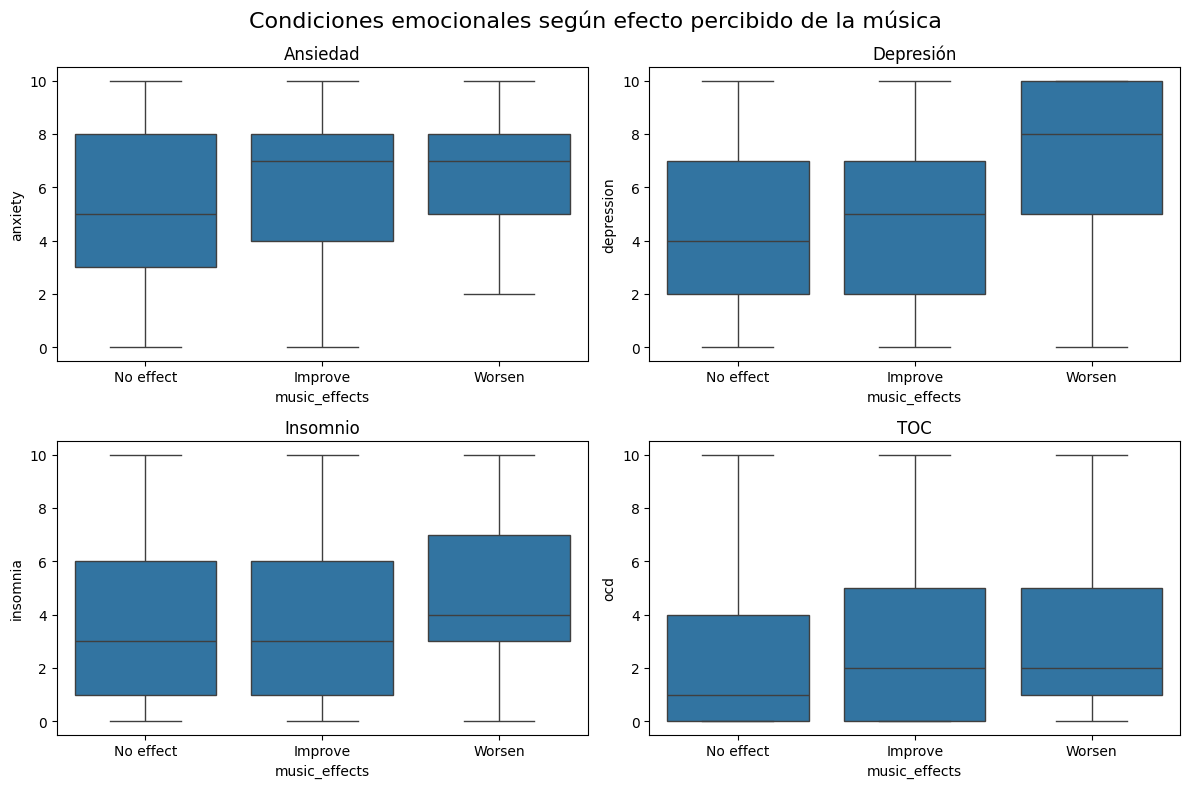

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots para comparar condiciones emocionales según efecto percibido de la música
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Condiciones emocionales según efecto percibido de la música', fontsize=16)

sns.boxplot(x='music_effects', y='anxiety', data=df, ax=axes[0,0])
axes[0,0].set_title('Ansiedad')

sns.boxplot(x='music_effects', y='depression', data=df, ax=axes[0,1])
axes[0,1].set_title('Depresión')

sns.boxplot(x='music_effects', y='insomnia', data=df, ax=axes[1,0])
axes[1,0].set_title('Insomnio')

sns.boxplot(x='music_effects', y='ocd', data=df, ax=axes[1,1])
axes[1,1].set_title('TOC')

plt.tight_layout()
plt.show()


Resultados: Relación entre el efecto percibido de la música y condiciones emocionales
Se analizaron los niveles autoinformados de ansiedad, depresión, insomnio y TOC de acuerdo al efecto que las personas perciben que tiene la música en su bienestar emocional (Improve, No effect, Worsen).

👉 Promedios observados:
Efecto percibido	Ansiedad	Depresión	Insomnio	TOC
Improve	              6.05   	   4.86	      3.76	    2.72
No effect	          5.12	       4.38	      3.67	    2.36
Worsen	              6.76	       7.18	      4.53	    3.12
🧠 Interpretación:
Las personas que perciben que la música empeora su estado emocional reportan los niveles más altos de ansiedad, depresión, insomnio y TOC.

Curiosamente, quienes reportan que la música no tiene efecto tienen niveles ligeramente menores en comparación con quienes dicen que mejora su estado.

Esto sugiere que, aunque muchas personas se benefician emocionalmente al escuchar música, quienes ya enfrentan niveles altos de malestar pueden ser más sensibles o tener respuestas más variadas.

📌 Posibles siguientes pasos:
Realizar pruebas estadísticas para ver si las diferencias son significativas (ANOVA o Kruskal-Wallis).

Cruzar esta variable con fav_genre o hours_per_day para ver si el tipo o cantidad de música escuchada influye.

In [6]:
from scipy.stats import kruskal

# Agrupar datos por efecto de la música
grouped = df.groupby('music_effects')

# Extraer listas por grupo
anxiety_groups = [group['anxiety'].dropna().values for name, group in grouped]
depression_groups = [group['depression'].dropna().values for name, group in grouped]
insomnia_groups = [group['insomnia'].dropna().values for name, group in grouped]
ocd_groups = [group['ocd'].dropna().values for name, group in grouped]

# Aplicar Kruskal-Wallis
kw_anxiety = kruskal(*anxiety_groups)
kw_depression = kruskal(*depression_groups)
kw_insomnia = kruskal(*insomnia_groups)
kw_ocd = kruskal(*ocd_groups)

# Mostrar resultados
print("Kruskal-Wallis resultados:")
print(f"Ansiedad: Estadístico={kw_anxiety.statistic:.3f}, p-valor={kw_anxiety.pvalue:.4f}")
print(f"Depresión: Estadístico={kw_depression.statistic:.3f}, p-valor={kw_depression.pvalue:.4f}")
print(f"Insomnio: Estadístico={kw_insomnia.statistic:.3f}, p-valor={kw_insomnia.pvalue:.4f}")
print(f"TOC: Estadístico={kw_ocd.statistic:.3f}, p-valor={kw_ocd.pvalue:.4f}")


Kruskal-Wallis resultados:
Ansiedad: Estadístico=12.583, p-valor=0.0019
Depresión: Estadístico=13.404, p-valor=0.0012
Insomnio: Estadístico=1.747, p-valor=0.4174
TOC: Estadístico=4.042, p-valor=0.1325


Sí existen diferencias significativas entre los grupos de efecto percibido de la música (music_effects) en cuanto a ansiedad y depresión.

No hay diferencias estadísticamente significativas en los niveles de insomnio ni TOC entre los grupos.

Esto sugiere que la música podría tener un impacto relevante sobre la ansiedad y la depresión, al menos desde la percepción de quienes participaron.

In [4]:
for col in df.columns:
    print(f"'{col}'")


'Timestamp'
'Age'
'Primary streaming service'
'Hours per day'
'While working'
'Instrumentalist'
'Composer'
'Fav genre'
'Exploratory'
'Foreign languages'
'BPM'
'Frequency [Classical]'
'Frequency [Country]'
'Frequency [EDM]'
'Frequency [Folk]'
'Frequency [Gospel]'
'Frequency [Hip hop]'
'Frequency [Jazz]'
'Frequency [K pop]'
'Frequency [Latin]'
'Frequency [Lofi]'
'Frequency [Metal]'
'Frequency [Pop]'
'Frequency [R&B]'
'Frequency [Rap]'
'Frequency [Rock]'
'Frequency [Video game music]'
'Anxiety'
'Depression'
'Insomnia'
'OCD'
'Music effects'
'Permissions'


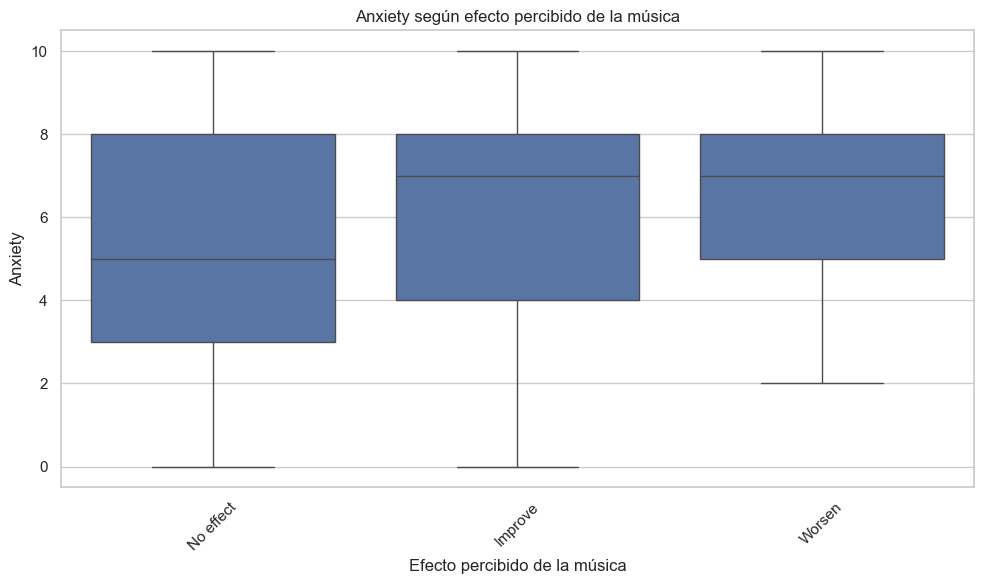

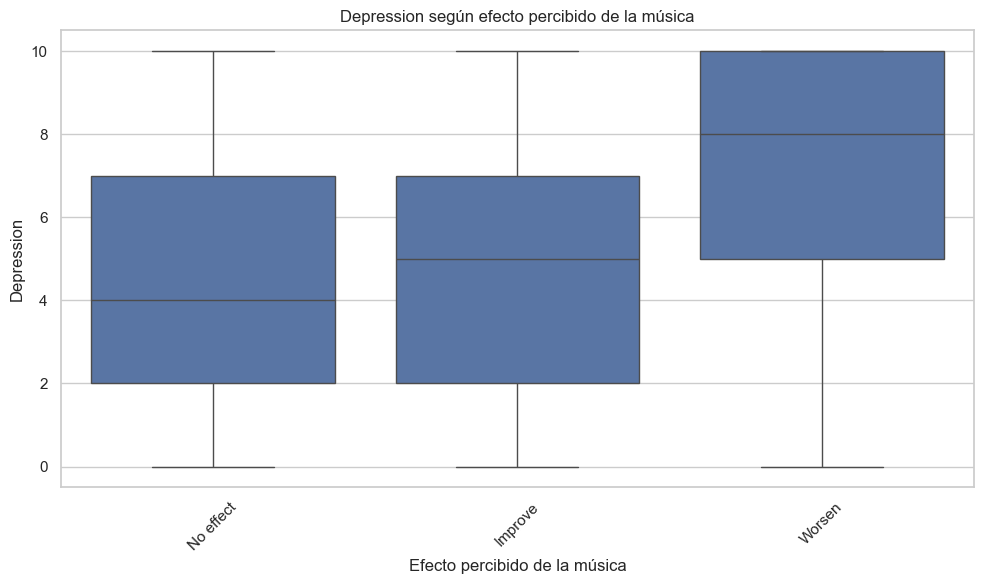

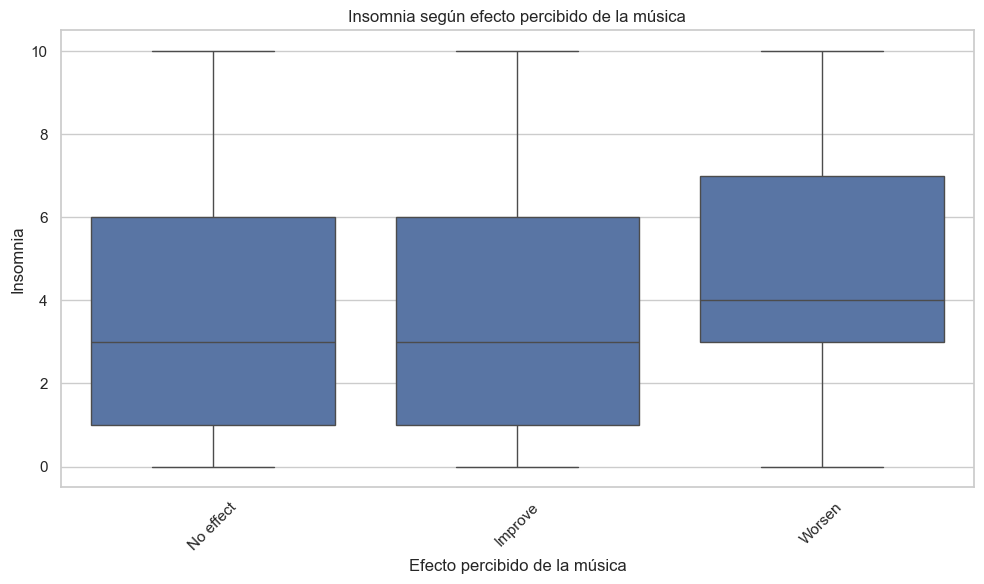

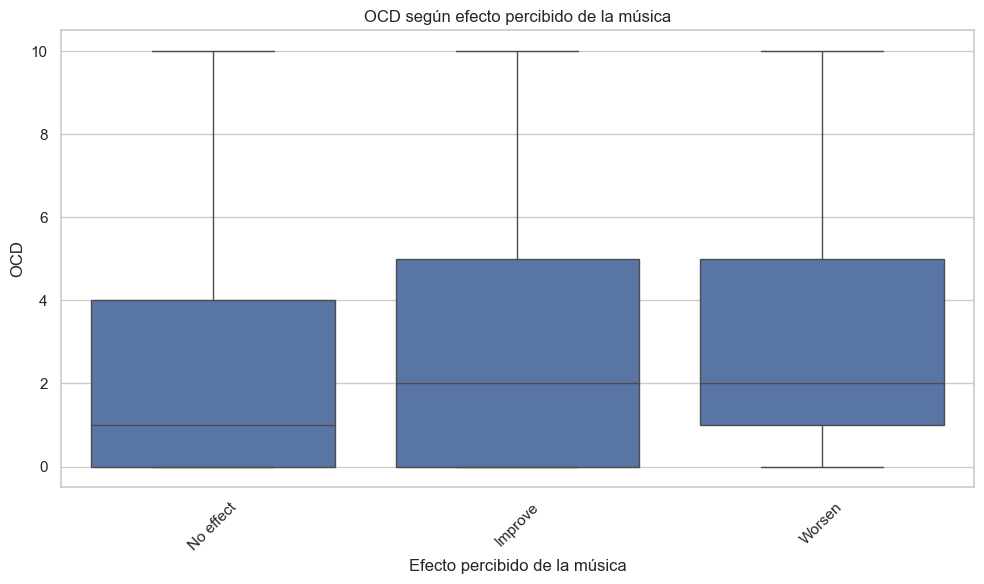

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Variables corregidas
variables = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Crear boxplots
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Music effects', y=var)
    plt.title(f'{var} según efecto percibido de la música')
    plt.xlabel('Efecto percibido de la música')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


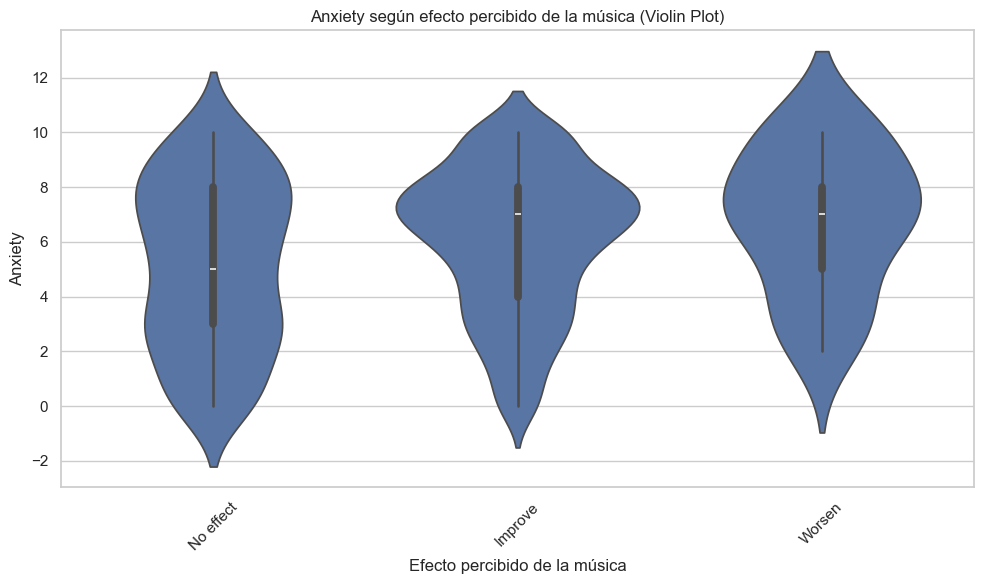

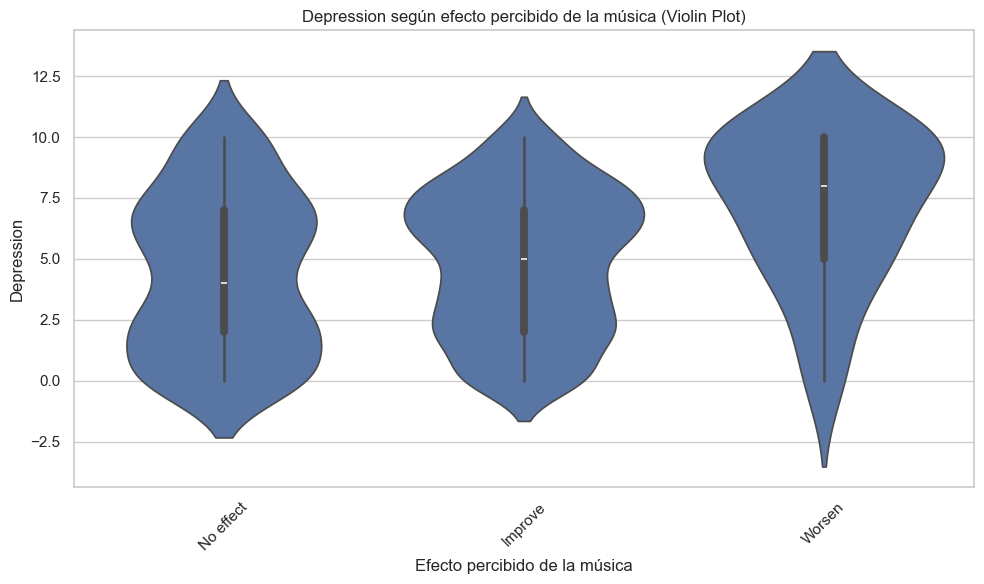

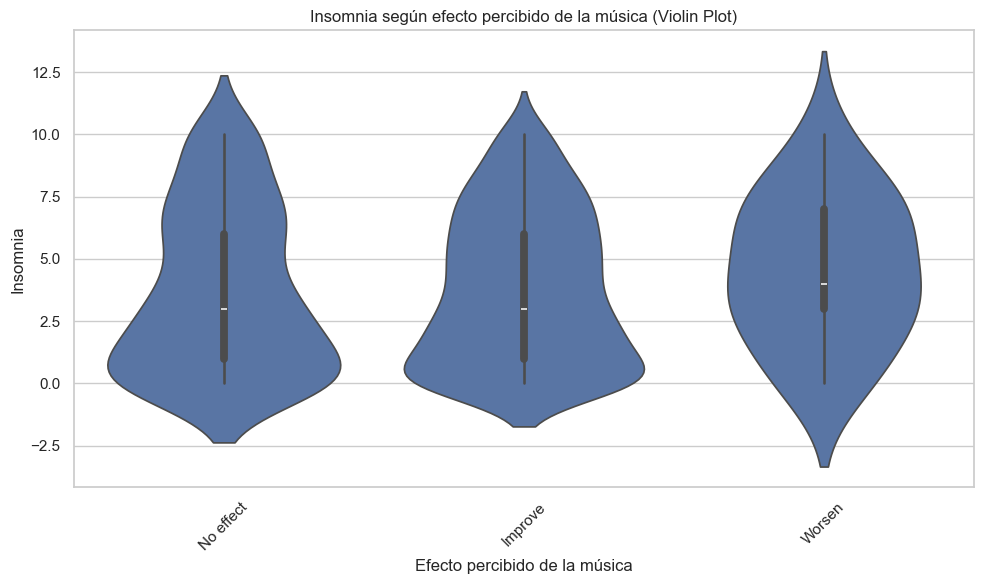

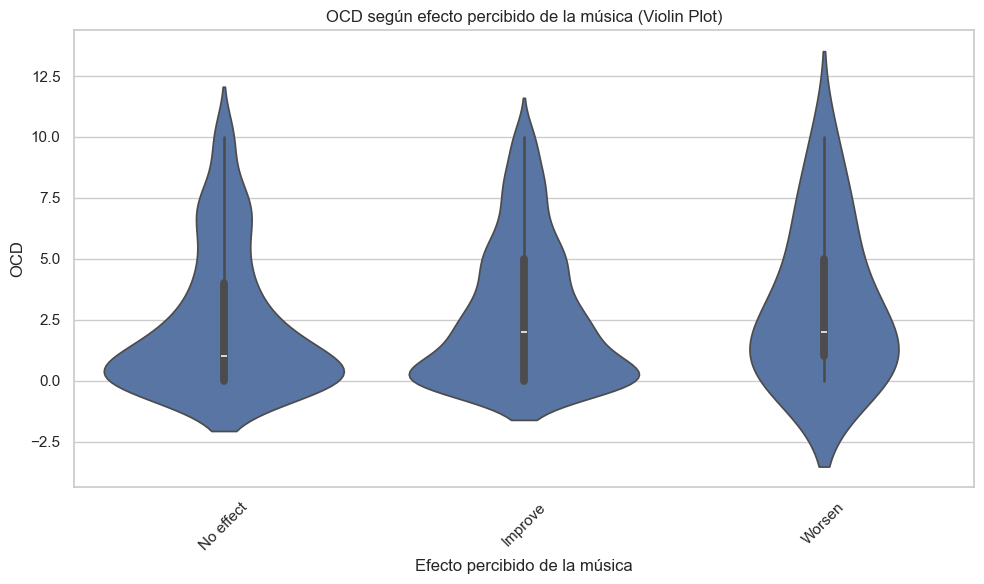

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Variables a graficar
variables = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Crear violin plots
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Music effects', y=var, inner='box')
    plt.title(f'{var} según efecto percibido de la música (Violin Plot)')
    plt.xlabel('Efecto percibido de la música')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Interpretación visual de los violin plots:
1. Ansiedad:
El grupo que percibe que la música "mejora" su estado muestra una mediana más baja que los otros grupos.

El grupo "empeora" tiene una distribución más alta en niveles de ansiedad. 👉 Esto respalda el resultado estadístico: la música puede influir en la ansiedad.

2. Depresión:
El grupo "empeora" muestra claramente una mediana más alta en depresión.

El grupo "mejora" tiene una mediana más baja, aunque no tan clara como con ansiedad. 👉 De nuevo, el patrón visual coincide con la significancia del test de Kruskal-Wallis.

3. Insomnio:
Las tres curvas se ven bastante similares, sin diferencias marcadas en la mediana. 👉 Esto coincide con el resultado no significativo del test.



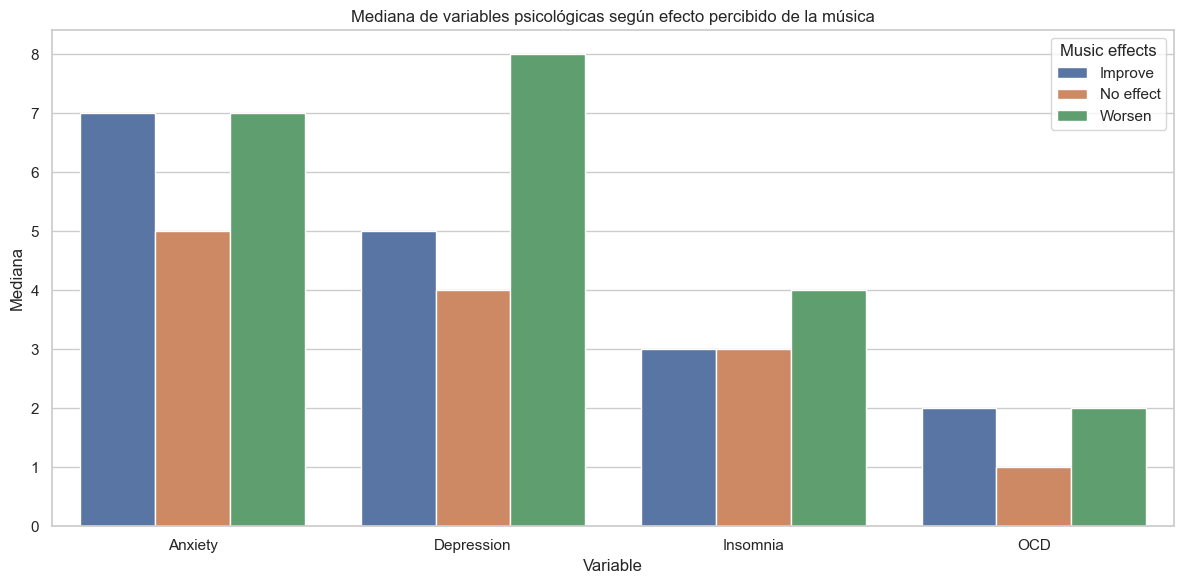

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar por efecto percibido de la música y calcular la mediana
medians = df.groupby('Music effects')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].median().reset_index()

# Configuración de estilo
sns.set(style="whitegrid")

# Reorganizar el DataFrame para graficar con Seaborn
medians_melted = medians.melt(id_vars='Music effects', var_name='Variable', value_name='Mediana')

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=medians_melted, x='Variable', y='Mediana', hue='Music effects')
plt.title('Mediana de variables psicológicas según efecto percibido de la música')
plt.xlabel('Variable')
plt.ylabel('Mediana')
plt.legend(title='Music effects')
plt.tight_layout()
plt.show()


Interpretación del gráfico
Ansiedad (Anxiety): Las personas que sienten que la música empeora su estado tienen una mayor mediana de ansiedad (7), comparado con quienes dicen que les mejora (7) o no tiene efecto (5).

Depresión: Claramente más alta en quienes sienten que la música les empeora (8), mientras que mejora o no efecto están más bajas (5 y 4).

Insomnio: Igual tendencia, siendo mayor la mediana en quienes sienten que la música les empeora.

TOC (OCD): Aunque en valores más bajos, también hay una diferencia visible entre quienes sienten que la música no les ayuda frente a quienes sí.

Análisis de la mediana por efecto percibido de la música
La siguiente gráfica compara la mediana de las puntuaciones de ansiedad, depresión, insomnio y TOC entre los grupos de efecto percibido de la música (Improve, No effect, Worsen).

🔹 Ansiedad:
El grupo que percibe que la música empeora su estado muestra la mediana más alta.

Le sigue el grupo que dice que la música mejora su ansiedad.

La mediana más baja está en quienes no perciben efecto. ✅ Coincide con el resultado significativo del test Kruskal-Wallis.

🔹 Depresión:
La mediana más alta también se encuentra en el grupo Worsen.

El grupo Improve muestra un nivel intermedio.

No effect tiene la mediana más baja. ✅ Se confirma la diferencia significativa en depresión entre grupos.

🔹 Insomnio:
Las medianas entre Improve y No effect son iguales (≈3).

El grupo Worsen presenta una mediana ligeramente superior. ❌ No hay diferencias significativas según Kruskal-Wallis.

🔹 TOC (OCD):
Pocas diferencias entre grupos.

Worsen y Improve tienen una mediana de 2, mientras que No effect marca 1. ❌ Tampoco se detectan diferencias significativas.



Conclusión visual:
Este resumen visual refuerza que la música, según la percepción de los participantes, podría influir más notoriamente en ansiedad y depresión. No se observaron efectos importantes en insomnio ni TOC.